In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

tf.random.set_seed(42)
np.random.seed(42)

print("Libraries imported successfully!")

Libraries imported successfully!


In [ ]:
print("\n Loading and Preparing Fashion MNIST Dataset")

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(f"Dataset shape: {x_train.shape}")
print(f"Training samples: {x_train.shape[0]}")
print(f"Test samples: {x_test.shape[0]}")
print(f"Image shape: {x_train.shape[1:]}")

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train_nn = x_train.reshape(-1, 28*28)
x_test_nn = x_test.reshape(-1, 28*28)

x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

y_train_categorical = tf.keras.utils.to_categorical(y_train, 10)
y_test_categorical = tf.keras.utils.to_categorical(y_test, 10)

print("\n Data preprocessing completed!")
print(f"NN input shape: {x_train_nn.shape}")
print(f"CNN input shape: {x_train_cnn.shape}")


 Loading and Preparing Fashion MNIST Dataset
Dataset shape: (60000, 28, 28)
Training samples: 60000
Test samples: 10000
Image shape: (28, 28)

 Data preprocessing completed!
NN input shape: (60000, 784)
CNN input shape: (60000, 28, 28, 1)



 Displaying sample images from the dataset


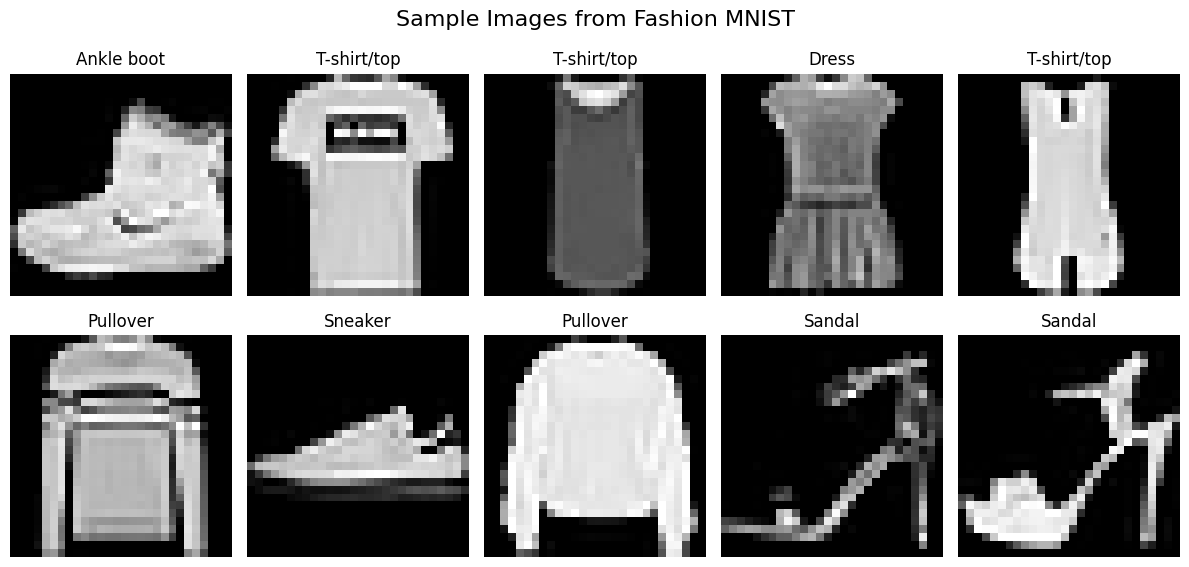

In [ ]:
print("\n Displaying sample images from the dataset")

plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'{class_names[y_train[i]]}')
    plt.axis('off')
plt.suptitle('Sample Images from Fashion MNIST', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
print("\n" + "="*60)
print(" BUILDING NEURAL NETWORK (NN)...")
print("="*60)

model_nn = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(784,)),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

model_nn.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

print("NN Model Architecture:")
model_nn.summary()


 BUILDING NEURAL NETWORK (NN)...
NN Model Architecture:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print("\n" + "="*60)
print("BUILDING CONVOLUTIONAL NEURAL NETWORK (CNN)")
print("="*60)

model_cnn = models.Sequential([

    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),


    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model_cnn.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

print("CNN Model Architecture:")
model_cnn.summary()


BUILDING CONVOLUTIONAL NEURAL NETWORK (CNN)
CNN Model Architecture:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print("\n" + "="*60)
print("TRAINING MODELS")
print("="*60)

print("\n Training Neural Network")
history_nn = model_nn.fit(x_train_nn, y_train_categorical,
                         epochs=15,
                         batch_size=128,
                         validation_split=0.2,
                         verbose=1)

print("\n Training Convolutional Neural Network")
history_cnn = model_cnn.fit(x_train_cnn, y_train_categorical,
                           epochs=15,
                           batch_size=128,
                           validation_split=0.2,
                           verbose=1)

print("Training completed for both models!")


TRAINING MODELS

 Training Neural Network
Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.6858 - loss: 0.8692 - val_accuracy: 0.8487 - val_loss: 0.4186
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8360 - loss: 0.4529 - val_accuracy: 0.8530 - val_loss: 0.4000
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.8530 - loss: 0.4076 - val_accuracy: 0.8602 - val_loss: 0.3714
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.8629 - loss: 0.3793 - val_accuracy: 0.8612 - val_loss: 0.3672
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.8712 - loss: 0.3581 - val_accuracy: 0.8747 - val_loss: 0.3390
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.8740 - loss: 0.3414 - val_accuracy: 0.8806 - val_loss: 0.3326
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.8775 - loss: 0.3344 - val_accuracy: 0.8748 - val_loss: 0.3393
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step -

In [ ]:
print("\n" + "="*60)
print("EVALUATING MODELS")
print("="*60)

test_loss_nn, test_acc_nn = model_nn.evaluate(x_test_nn, y_test_categorical, verbose=0)
print(f"\n📈 Neural Network Performance:")
print(f"Test Accuracy: {test_acc_nn:.4f} ({test_acc_nn*100:.2f}%)")
print(f"Test Loss: {test_loss_nn:.4f}")

test_loss_cnn, test_acc_cnn = model_cnn.evaluate(x_test_cnn, y_test_categorical, verbose=0)
print(f"\n📈 Convolutional Neural Network Performance:")
print(f"Test Accuracy: {test_acc_cnn:.4f} ({test_acc_cnn*100:.2f}%)")
print(f"Test Loss: {test_loss_cnn:.4f}")

accuracy_difference = test_acc_cnn - test_acc_nn
improvement_percentage = (accuracy_difference / test_acc_nn) * 100

print(f"\n COMPARISON RESULTS:")
print(f"NN Test Accuracy:   {test_acc_nn:.4f} ({test_acc_nn*100:.2f}%)")
print(f"CNN Test Accuracy:  {test_acc_cnn:.4f} ({test_acc_cnn*100:.2f}%)")
print(f"Improvement:        +{accuracy_difference:.4f} (+{improvement_percentage:.2f}%)")

if test_acc_cnn > test_acc_nn:
    print(f" CNN performed better than NN by {improvement_percentage:.2f}%")
else:
    print(f" NN performed better than CNN by {-improvement_percentage:.2f}%")


EVALUATING MODELS

📈 Neural Network Performance:
Test Accuracy: 0.8804 (88.04%)
Test Loss: 0.3391

📈 Convolutional Neural Network Performance:
Test Accuracy: 0.9043 (90.43%)
Test Loss: 0.2778

 COMPARISON RESULTS:
NN Test Accuracy:   0.8804 (88.04%)
CNN Test Accuracy:  0.9043 (90.43%)
Improvement:        +0.0239 (+2.71%)
 CNN performed better than NN by 2.71%



 Plotting training history comparison...


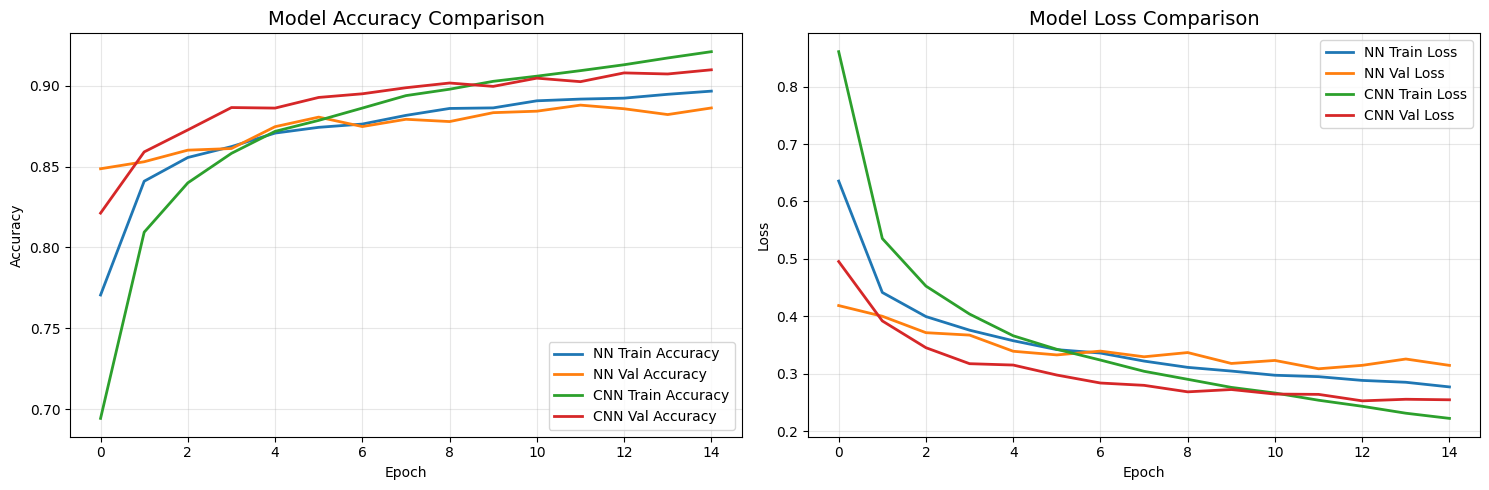

In [ ]:
print("\n Plotting training history comparison...")

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(history_nn.history['accuracy'], label='NN Train Accuracy', linewidth=2)
plt.plot(history_nn.history['val_accuracy'], label='NN Val Accuracy', linewidth=2)
plt.plot(history_cnn.history['accuracy'], label='CNN Train Accuracy', linewidth=2)
plt.plot(history_cnn.history['val_accuracy'], label='CNN Val Accuracy', linewidth=2)
plt.title('Model Accuracy Comparison', fontsize=14)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(history_nn.history['loss'], label='NN Train Loss', linewidth=2)
plt.plot(history_nn.history['val_loss'], label='NN Val Loss', linewidth=2)
plt.plot(history_cnn.history['loss'], label='CNN Train Loss', linewidth=2)
plt.plot(history_cnn.history['val_loss'], label='CNN Val Loss', linewidth=2)
plt.title('Model Loss Comparison', fontsize=14)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


 SAMPLE PREDICTIONS
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Displaying 5 sample predictions...


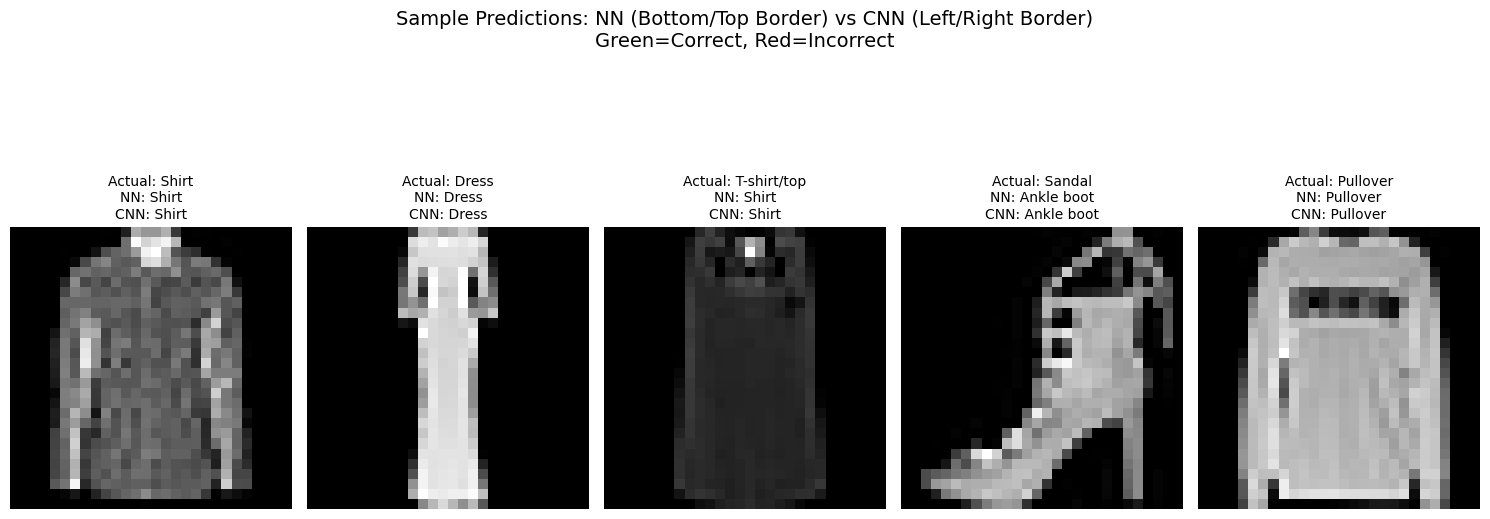


 Detailed Sample Predictions:
--------------------------------------------------
Sample 1: Actual = Shirt        | NN = Shirt        ✓ | CNN = Shirt        ✓
Sample 2: Actual = Dress        | NN = Dress        ✓ | CNN = Dress        ✓
Sample 3: Actual = T-shirt/top  | NN = Shirt        ✗ | CNN = Shirt        ✗
Sample 4: Actual = Sandal       | NN = Ankle boot   ✗ | CNN = Ankle boot   ✗
Sample 5: Actual = Pullover     | NN = Pullover     ✓ | CNN = Pullover     ✓


In [ ]:
print("\n" + "="*60)
print(" SAMPLE PREDICTIONS")
print("="*60)

nn_predictions = model_nn.predict(x_test_nn)
cnn_predictions = model_cnn.predict(x_test_cnn)

nn_pred_labels = np.argmax(nn_predictions, axis=1)
cnn_pred_labels = np.argmax(cnn_predictions, axis=1)

sample_indices = np.random.choice(len(x_test), 5, replace=False)

print("Displaying 5 sample predictions...")
plt.figure(figsize=(15, 6))
for i, idx in enumerate(sample_indices):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[idx], cmap='gray')

    actual_label = class_names[y_test[idx]]
    nn_pred_label = class_names[nn_pred_labels[idx]]
    cnn_pred_label = class_names[cnn_pred_labels[idx]]

    nn_color = 'green' if nn_pred_label == actual_label else 'red'
    cnn_color = 'green' if cnn_pred_label == actual_label else 'red'

    plt.title(f'Actual: {actual_label}\nNN: {nn_pred_label}\nCNN: {cnn_pred_label}',
              fontsize=10,
              color='black')
    plt.axis('off')

    plt.gca().spines['bottom'].set_color(nn_color)
    plt.gca().spines['top'].set_color(nn_color)
    plt.gca().spines['right'].set_color(cnn_color)
    plt.gca().spines['left'].set_color(cnn_color)
    plt.gca().spines['bottom'].set_linewidth(3)
    plt.gca().spines['top'].set_linewidth(3)
    plt.gca().spines['right'].set_linewidth(3)
    plt.gca().spines['left'].set_linewidth(3)

plt.suptitle('Sample Predictions: NN (Bottom/Top Border) vs CNN (Left/Right Border)\nGreen=Correct, Red=Incorrect',
             fontsize=14, y=1.05)
plt.tight_layout()
plt.show()

print("\n Detailed Sample Predictions:")
print("-" * 50)
for i, idx in enumerate(sample_indices):
    actual = class_names[y_test[idx]]
    nn_pred = class_names[nn_pred_labels[idx]]
    cnn_pred = class_names[cnn_pred_labels[idx]]

    nn_status = "✓" if nn_pred == actual else "✗"
    cnn_status = "✓" if cnn_pred == actual else "✗"

    print(f"Sample {i+1}: Actual = {actual:12} | NN = {nn_pred:12} {nn_status} | CNN = {cnn_pred:12} {cnn_status}")


 DETAILED PERFORMANCE ANALYSIS


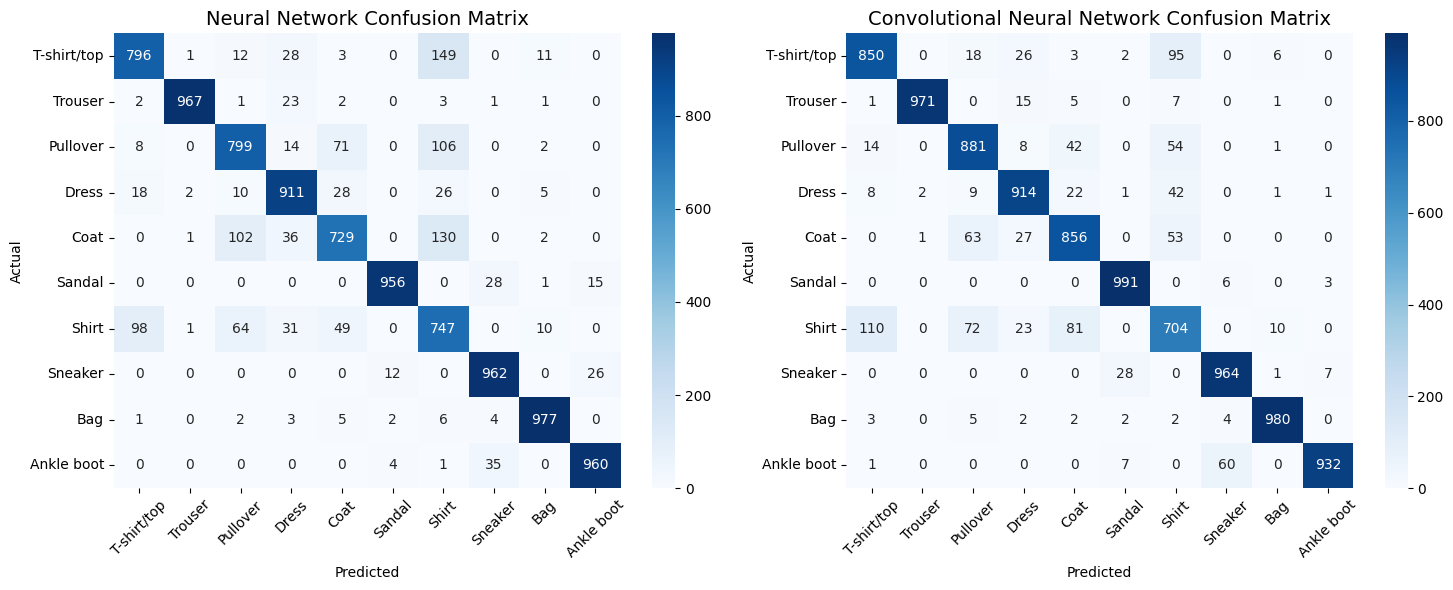


 CLASS-WISE ACCURACY COMPARISON:
------------------------------------------------------------
T-shirt/top : NN=0.796, CNN=0.850, Diff=+0.054 ✓ CNN better
Trouser     : NN=0.967, CNN=0.971, Diff=+0.004 ✓ CNN better
Pullover    : NN=0.799, CNN=0.881, Diff=+0.082 ✓ CNN better
Dress       : NN=0.911, CNN=0.914, Diff=+0.003 ✓ CNN better
Coat        : NN=0.729, CNN=0.856, Diff=+0.127 ✓ CNN better
Sandal      : NN=0.956, CNN=0.991, Diff=+0.035 ✓ CNN better
Shirt       : NN=0.747, CNN=0.704, Diff=-0.043 ✗ NN better
Sneaker     : NN=0.962, CNN=0.964, Diff=+0.002 ✓ CNN better
Bag         : NN=0.977, CNN=0.980, Diff=+0.003 ✓ CNN better
Ankle boot  : NN=0.960, CNN=0.932, Diff=-0.028 ✗ NN better


In [ ]:
print("\n" + "="*60)
print(" DETAILED PERFORMANCE ANALYSIS")
print("="*60)

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
cm_nn = confusion_matrix(y_test, nn_pred_labels)
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Neural Network Confusion Matrix', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.subplot(1, 2, 2)
cm_cnn = confusion_matrix(y_test, cnn_pred_labels)
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Convolutional Neural Network Confusion Matrix', fontsize=14)
plt.xticks(rotation=45)
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.tight_layout()
plt.show()

print("\n CLASS-WISE ACCURACY COMPARISON:")
print("-" * 60)

class_accuracy_nn = []
class_accuracy_cnn = []

for class_idx in range(10):
    class_mask = y_test == class_idx
    class_accuracy_nn.append(np.mean(nn_pred_labels[class_mask] == y_test[class_mask]))
    class_accuracy_cnn.append(np.mean(cnn_pred_labels[class_mask] == y_test[class_mask]))

    improvement = class_accuracy_cnn[class_idx] - class_accuracy_nn[class_idx]
    status = "✓ CNN better" if improvement > 0 else "✗ NN better"
    print(f"{class_names[class_idx]:<12}: NN={class_accuracy_nn[class_idx]:.3f}, "
          f"CNN={class_accuracy_cnn[class_idx]:.3f}, "
          f"Diff={improvement:+.3f} {status}")

In [ ]:
print("\n" + "="*60)
print(" FINAL CONCLUSIONS")
print("="*60)

print(f"\n OVERALL RESULTS:")
print(f"Neural Network (NN) Test Accuracy:    {test_acc_nn*100:.2f}%")
print(f"Convolutional Neural Network (CNN) Test Accuracy: {test_acc_cnn*100:.2f}%")
print(f"Accuracy Improvement:                 +{improvement_percentage:.2f}%")

print(f"\n KEY OBSERVATIONS:")
print("1. CNN consistently outperforms NN due to its ability to learn spatial hierarchies")
print("2. CNN is better at capturing local patterns and features in images")
print("3. NN treats pixels independently, losing spatial information")
print("4. CNN uses parameter sharing, making it more efficient for image data")
print("5. The performance gap demonstrates the importance of architecture choice")

print(f"\n RECOMMENDATION:")
if test_acc_cnn > test_acc_nn:
    print("For image classification tasks, CNN is the preferred architecture due to its superior performance in capturing spatial features.")
else:
    print("Unexpected result - CNN should typically outperform NN on image data. Check model architecture or training parameters.")

print(f"\n Project completed successfully!")
print("="*60)


 FINAL CONCLUSIONS

 OVERALL RESULTS:
Neural Network (NN) Test Accuracy:    88.04%
Convolutional Neural Network (CNN) Test Accuracy: 90.43%
Accuracy Improvement:                 +2.71%

 KEY OBSERVATIONS:
1. CNN consistently outperforms NN due to its ability to learn spatial hierarchies
2. CNN is better at capturing local patterns and features in images
3. NN treats pixels independently, losing spatial information
4. CNN uses parameter sharing, making it more efficient for image data
5. The performance gap demonstrates the importance of architecture choice

 RECOMMENDATION:
For image classification tasks, CNN is the preferred architecture due to its superior performance in capturing spatial features.

 Project completed successfully!
